In [12]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Import data

In [14]:
df = pd.read_csv('../../datasets/Organic.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,3199,6917,8
1,2015-01-11,8856,15071,25
2,2015-01-18,5475,32539,42
3,2015-01-25,4271,8412,585
4,2015-02-01,4824,10710,104


In [15]:
data = df[['Envi']]

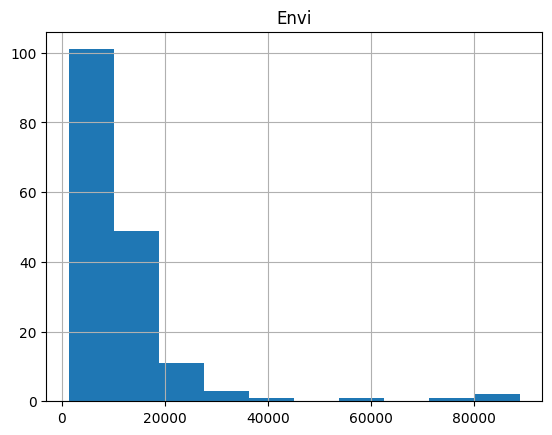

In [16]:
data.hist();

In [17]:
data = data.transform(np.log)

In [18]:
seq_df = window_input_output(26, 26, data)
seq_df.head()

,Envi,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25
51,9.137770,9.127285,8.911934,8.253748,8.552367,8.801319,9.332027,10.530709,8.674368,7.503290,...,10.457143,9.665801,8.514590,7.760893,8.012350,8.481359,8.359603,8.607948,9.088850,8.070594
52,8.854094,9.137770,9.127285,8.911934,8.253748,8.552367,8.801319,9.332027,10.530709,8.674368,...,10.236955,10.457143,9.665801,8.514590,7.760893,8.012350,8.481359,8.359603,8.607948,9.088850
53,8.382518,8.854094,9.137770,9.127285,8.911934,8.253748,8.552367,8.801319,9.332027,10.530709,...,9.144841,10.236955,10.457143,9.665801,8.514590,7.760893,8.012350,8.481359,8.359603,8.607948
54,8.708144,8.382518,8.854094,9.137770,9.127285,8.911934,8.253748,8.552367,8.801319,9.332027,...,8.604471,9.144841,10.236955,10.457143,9.665801,8.514590,7.760893,8.012350,8.481359,8.359603
55,8.933400,8.708144,8.382518,8.854094,9.137770,9.127285,8.911934,8.253748,8.552367,8.801319,...,9.070733,8.604471,9.144841,10.236955,10.457143,9.665801,8.514590,7.760893,8.012350,8.481359


## Split data

In [19]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Envi')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [20]:
model = ElasticNet()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score

In [21]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Envi):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Envi):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Envi): 0.31343799063370015
Mean Absolute Error (Envi): 0.44119498215026154
R-squared (Test score) -0.37222827699027383
Train score 0.0


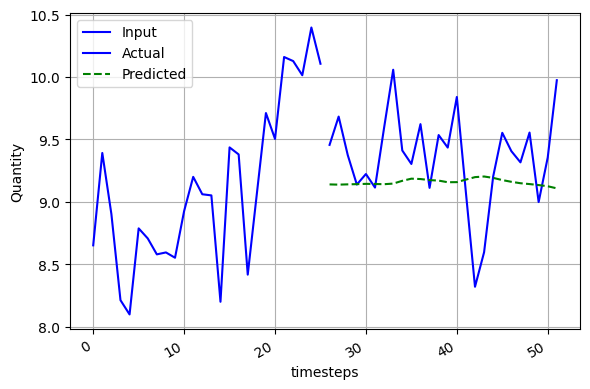

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 26, 1), X_test.iloc[1, ], 'b-', label='Input')
ax.plot(np.arange(26, 52, 1), y_test.iloc[1, ], color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

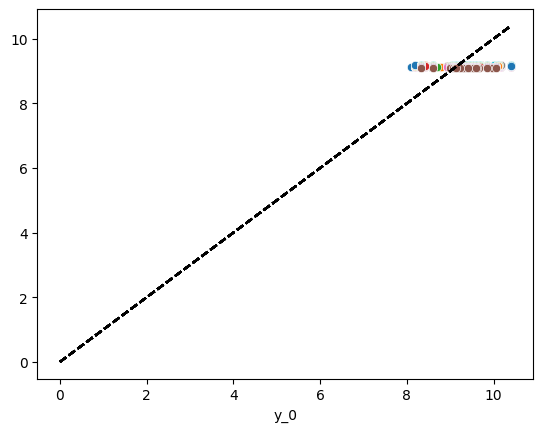

In [23]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')